In [33]:
import yfinance as yf
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import yfinance as yf

In [ ]:
# ASX stock symbol
symbol = "bhp.AX"

# the date range for historical data
start_date = "1980-01-01" 
end_date = datetime.now().strftime("%Y-%m-%d")

# download historical stock data - yfinance
data = yf.download(symbol, start=start_date, end=end_date)
df = data[["Open", "High", "Low", "Close", "Adj Close", "Volume"]].copy()
df

# HIGH PRICE PREDICTION

In [35]:
# Extract features and target variables
feature_columns = ["Open", "Low", "Close", "Adj Close", "Volume"]
target_high = df["High"]

# Create the feature DataFrame without the "High" column
features_high = df[feature_columns]

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features_high, target_high, random_state=42
)

In [37]:
# Scale the features
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

In [38]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [39]:
# Create a random forest regressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)

In [40]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [41]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

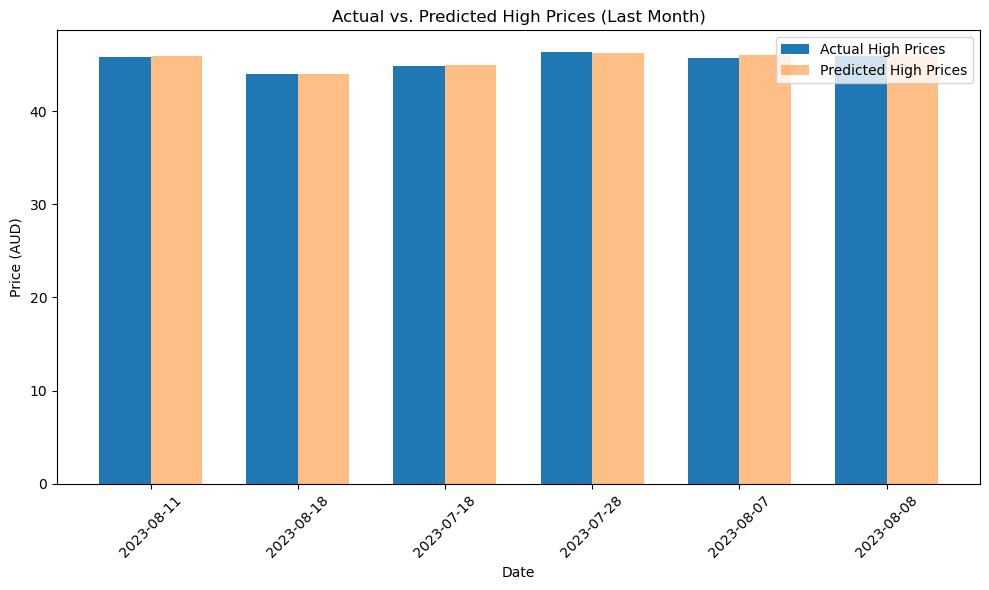

In [52]:
# Create a DataFrame with the actual and predicted values
prediction_data = pd.DataFrame({
    "Date": X_test.index,
    "Actual High": y_test,
    "Predicted High": predictions
})

# Filter data for the last month
last_month_data = prediction_data[prediction_data["Date"] >= prediction_data["Date"].max() - pd.DateOffset(months=1)]

# Calculate the bar width
bar_width = 0.35

# Create an array of indices for the x-axis positions
x_indices = np.arange(len(last_month_data))

# Plotting the actual and predicted values for the last month as side-by-side bars
plt.figure(figsize=(10, 6))
plt.bar(x_indices - bar_width/2, last_month_data["Actual High"], width=bar_width, label="Actual High Prices")
plt.bar(x_indices + bar_width/2, last_month_data["Predicted High"], width=bar_width, label="Predicted High Prices", alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Price (AUD)")
plt.title("Actual vs. Predicted High Prices (Last Month)")
plt.legend()
plt.xticks(x_indices, last_month_data["Date"].dt.strftime('%Y-%m-%d'), rotation=45)
plt.tight_layout()
plt.show()

# LOW PRICE PREDICITION

In [54]:
# Extract features and target variables
feature_columns_low = ["Open", "High", "Close", "Adj Close", "Volume"]
target_low = df["Low"]

# Create the feature DataFrame without the "Low" column
features_low = df[feature_columns_low]

In [55]:
# Split the data into training and testing sets
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    features_low, target_low, random_state=42
)

In [56]:
# Scale the features
scaler_l = StandardScaler()
X_scaler_l = scaler.fit(X_train_l)

In [57]:
# Scaling data
X_train_scaled_l = X_scaler_l.transform(X_train_l)
X_test_scaled_l = X_scaler_l.transform(X_test_l)

In [58]:
# Create a random forest regressor
rf_model_l = RandomForestRegressor(n_estimators=500, random_state=78)

In [59]:
# Fitting the model
rf_model_l = rf_model_l.fit(X_train_scaled_l, y_train_l)

In [60]:
# Making predictions using the testing data
predictions_low = rf_model_l.predict(X_test_scaled_l)

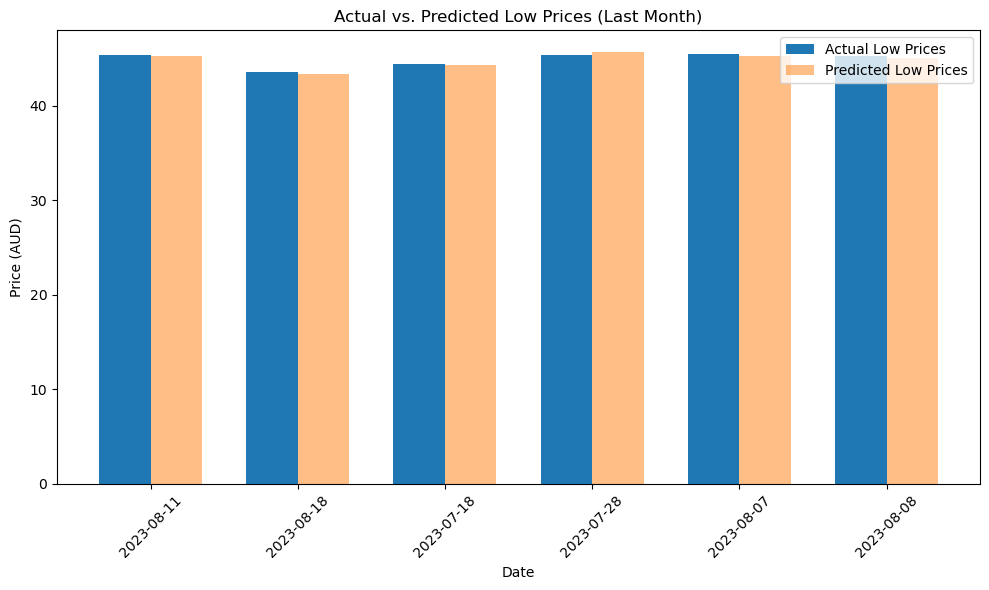

In [61]:
# Create a DataFrame with the actual and predicted values
prediction_low_data = pd.DataFrame({
    "Date": X_test_l.index,
    "Actual Low": y_test_l,
    "Predicted Low": predictions_low
})

# Filter data for the last month
last_month_data_low = prediction_low_data[prediction_low_data["Date"] >= prediction_low_data["Date"].max() - pd.DateOffset(months=1)]

# Calculate the bar width
bar_width = 0.35

# Create an array of indices for the x-axis positions
x_indices_l = np.arange(len(last_month_data_low))

# Plotting the actual and predicted values for the last month as side-by-side bars
plt.figure(figsize=(10, 6))
plt.bar(x_indices_l - bar_width/2, last_month_data_low["Actual Low"], width=bar_width, label="Actual Low Prices")
plt.bar(x_indices_l + bar_width/2, last_month_data_low["Predicted Low"], width=bar_width, label="Predicted Low Prices", alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Price (AUD)")
plt.title("Actual vs. Predicted Low Prices (Last Month)")
plt.legend()
plt.xticks(x_indices_l, last_month_data_low["Date"].dt.strftime('%Y-%m-%d'), rotation=45)
plt.tight_layout()
plt.show()

# Volume Prediction

In [63]:
# Extract features and target variables
feature_columns_volume = ["Open", "High", "Low", "Close", "Adj Close"]
target_volume = df["Volume"]

# Create the feature DataFrame without the "Low" column
features_volume = df[feature_columns_volume]

In [64]:
# Split the data into training and testing sets
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(
    features_volume, target_volume, random_state=42
)

In [65]:
# Scale the features
scaler_v = StandardScaler()
X_scaler_v = scaler.fit(X_train_v)

In [66]:
# Scaling data
X_train_scaled_v = X_scaler_v.transform(X_train_v)
X_test_scaled_v = X_scaler_v.transform(X_test_v)

In [67]:
# Create a random forest regressor
rf_model_v = RandomForestRegressor(n_estimators=500, random_state=78)

In [68]:
# Fitting the model
rf_model_v = rf_model_v.fit(X_train_scaled_v, y_train_v)

In [69]:
# Making predictions using the testing data
predictions_volume = rf_model_v.predict(X_test_scaled_v)

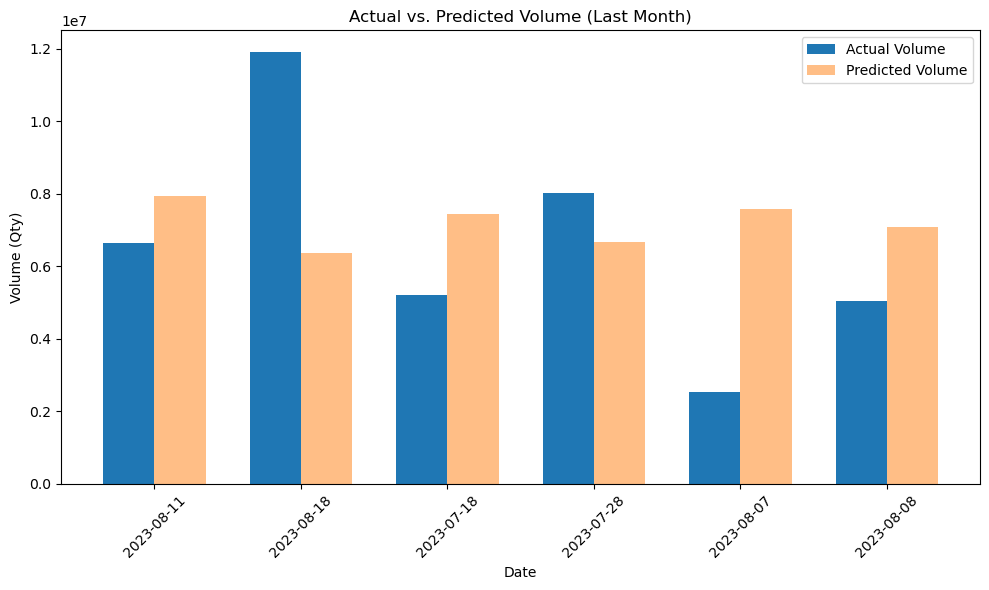

In [70]:
# Create a DataFrame with the actual and predicted values
prediction_volume_data = pd.DataFrame({
    "Date": X_test_v.index,
    "Actual Volume": y_test_v,
    "Predicted Volume": predictions_volume
})

# Filter data for the last month
last_month_data_volume = prediction_volume_data[prediction_volume_data["Date"] >= prediction_volume_data["Date"].max() - pd.DateOffset(months=1)]

# Calculate the bar width
bar_width = 0.35

# Create an array of indices for the x-axis positions
x_indices_v = np.arange(len(last_month_data_volume))

# Plotting the actual and predicted values for the last month as side-by-side bars
plt.figure(figsize=(10, 6))
plt.bar(x_indices_v - bar_width/2, last_month_data_volume["Actual Volume"], width=bar_width, label="Actual Volume")
plt.bar(x_indices_v + bar_width/2, last_month_data_volume["Predicted Volume"], width=bar_width, label="Predicted Volume", alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Volume (Qty)")
plt.title("Actual vs. Predicted Volume (Last Month)")
plt.legend()
plt.xticks(x_indices_v, last_month_data_volume["Date"].dt.strftime('%Y-%m-%d'), rotation=45)
plt.tight_layout()
plt.show()

# Combining dataframes

In [ ]:
Combined_prediction = pd.concat([prediction_data, prediction_low_data, prediction_volume_data], axis=1)


In [ ]:
Combined_prediction = Combined_prediction[['Date', 'Actual High', 'Predicted High', 'Actual Low', 'Predicted Low','Actual Volume','Predicted Volume']]

In [79]:
Combined_prediction = Combined_prediction.drop(columns= 'Date')

In [81]:
Combined_prediction.to_csv('Predictions.csv')